# Genetic drift

## Implementing on Python

### Imports


In [1]:
from numpy.random import default_rng # Random numbers generator
import matplotlib.pyplot as plt # Plotting
import numpy as np # Memory allocation
import gc # Garbage collector

In [2]:
def genetic_drift(
        seed: int = 5,
        size: int = 10,
        generations: int = 10,
        identity: bool = True,
        show_print: bool = False
) -> tuple[np.ndarray, np.ndarray]:
    N = size * 2 # Diploid organism
    rng = default_rng(seed=seed)
    alleles = np.arange(1,N+1, dtype=np.int32)
    if identity:
        palleles = alleles
    else:
        palleles = rng.choice(alleles,size=N,replace=True)
    a1 = set(rng.choice(alleles,size=3,replace=False))

    if show_print:
        print(f'Selected alleles: ', *palleles)
        print(f'A1 alleles: {sorted(a1)}',end='\n\n')
    
    # To graph
    p_a1 = np.zeros(generations, dtype=np.float64)
    He = np.zeros(generations, dtype=np.float64)

    for gen in range(generations):
        if show_print:
            print(f'Generation {gen+1}')

        pool = {'A1': [], 'A2': []}
        for idx, al in enumerate(palleles):
            (pool['A1'] if al in a1 else pool['A2']).append(idx)
        
        parent_idx = rng.integers(0, N, size=N) 
        dalleles = palleles[parent_idx]

        for i in range(N):
            pidx = parent_idx[i]
            allele_p = palleles[pidx]
            if show_print:
                clase = 'A1' if allele_p in a1 else 'A2'
                print(f'From Individual {pidx+1} [{clase}] - Allele {allele_p} '
                    f'-> Individual {i+1} - Allele {dalleles[i]}')
            
        unique, counts = np.unique(dalleles, return_counts=True)
        freqs = {
            int(u) : c/N
            for u, c in zip(unique.tolist(), counts.tolist())
        }
        pA1 = sum(freqs.get(k, 0.0) for k in a1)
        p_a1[gen] = pA1
        He[gen] = 2*pA1*(1 - pA1)
        
        if show_print:
            print(f'Allele counts: {freqs}')
            print(f'He = {He[gen]:.6f}\n')

        palleles = dalleles.copy()

    gc.collect()

    return p_a1, He

def plot_maker(
        y_vals: list[np.ndarray],
        time: int = 10,
        length: int = 8,
        width: int = 6,
        title: str = 'Freq-time',
        x_label: str = 'time',
        y_label: str = 'frequencies'
) -> None:
    colors =  plt.rcParams['axes.prop_cycle'].by_key()['color']
    x_vals = np.arange(1,time+1,dtype=np.int32)
    plt.figure(figsize=(length,width))

    for i, y in enumerate(y_vals):
        color = colors[i % len(colors)]
        y = np.asarray(y).ravel()
        if y.shape[0] != x_vals.shape[0]:
            raise ValueError(
                f"The series y[{i}] has length {y.shape[0]} "
                f"but time={x_vals.shape[0]}. "
                f"Use time=len(y) or adjust the series."
            )
        plt.plot(x_vals,y,linestyle='-',color=color,alpha=0.5,linewidth=2.5)
        plt.xticks(x_vals, rotation=90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.grid(True, alpha=0.5, linestyle="--")
    plt.show()

    return

In [8]:
p_a1, He = genetic_drift(seed=113, size=5, generations=20)

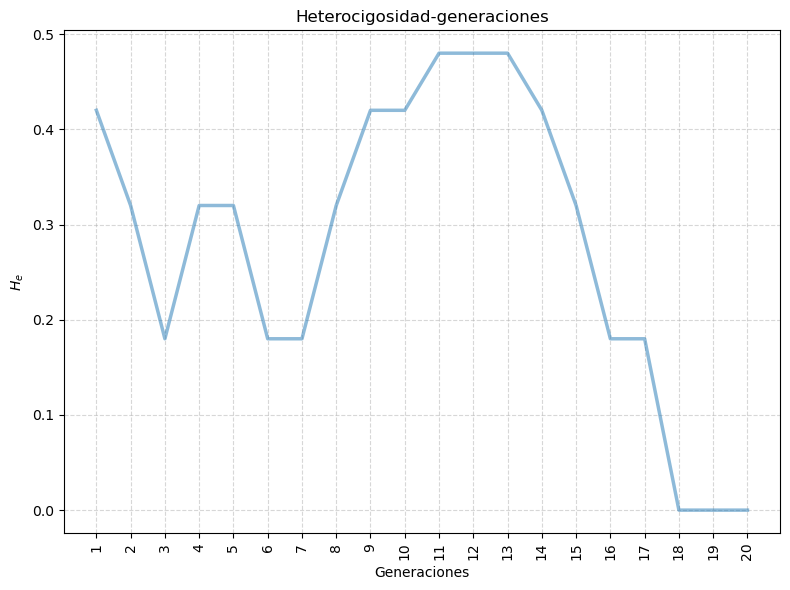

In [9]:
plot_maker([He],time=len(He),title='Heterocigosidad-generaciones',x_label='Generaciones',y_label='$H_e$')

In [21]:
A1_values = []
He_values = []
for i in range(1000):
    p_a1, He = genetic_drift(seed=113+i*5, size=1000, generations=50, show_print=False)
    A1_values.append(p_a1)
    He_values.append(He)

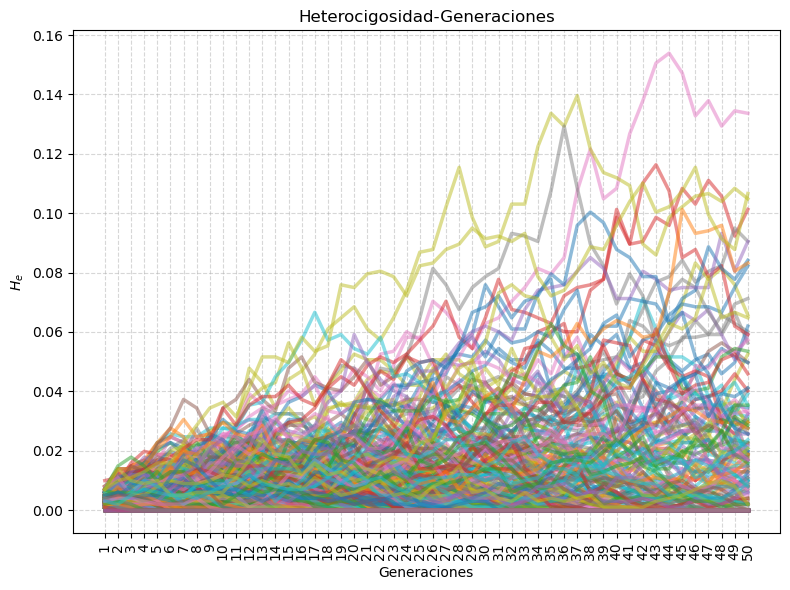

In [19]:
plot_maker(He_values,time=len(He_values[0]),title='Heterocigosidad-Generaciones',x_label='Generaciones',y_label='$H_e$')

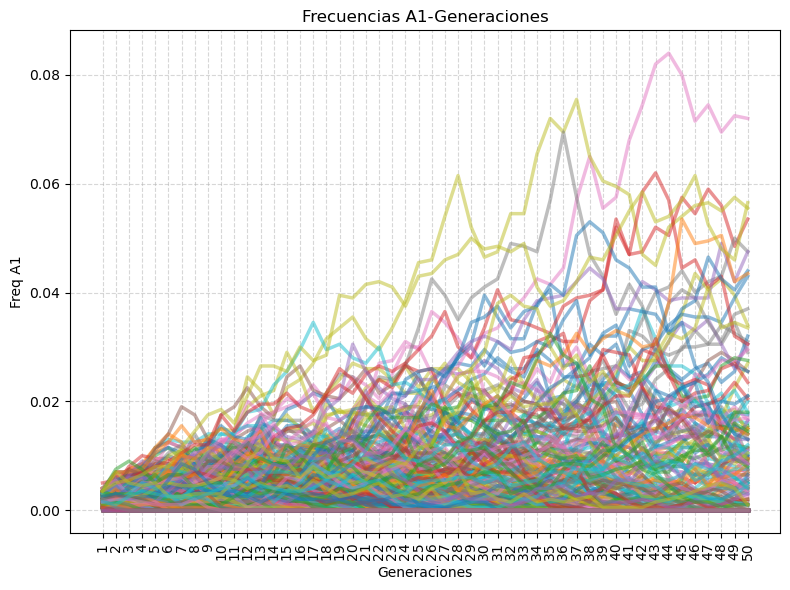

In [20]:
plot_maker(A1_values,time=len(A1_values[0]),title='Frecuencias A1-Generaciones',x_label='Generaciones',y_label='Freq A1')